In [10]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from maad import sound, features, rois
from maad.util import power2dB, plot2d, format_features, overlay_rois
import os
import itertools
import math

In [11]:
#Sunrise Files
sunrise_files = [
    {"suffix": "_051300", "DF_knock_train": [6, 15, 39], "DF_high_knock": [53], "DF_low_knock": [34, 36], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [17, 19], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_051900", "DF_knock_train": [3, 41], "DF_high_knock": [8], "DF_low_knock": [17, 18, 39, 46, 50, 53, 55], "DF_croak_chirp": [], "DF_short_coo": [13, 45, 51], "DF_coo": [5, 10], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [21, 31, 34]},
    {"suffix": "_052500", "DF_knock_train": [16, 25, 37, 46], "DF_high_knock": [], "DF_low_knock": [33, 42, 53, 55], "DF_croak_chirp": [], "DF_short_coo": [13], "DF_coo": [19, 20], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [24, 44]},
    {"suffix": "_053100", "DF_knock_train": [6, 11, 27, 32, 45, 46, 48], "DF_high_knock": [14], "DF_low_knock": [1, 16, 30, 38], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [41, 43, 47], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_053700", "DF_knock_train": [36, 45, 49], "DF_high_knock": [], "DF_low_knock": [25, 26], "DF_croak_chirp": [], "DF_short_coo": [20], "DF_coo": [21, 31], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [35, 42]},
    {"suffix": "_054300", "DF_knock_train": [21], "DF_high_knock": [46, 47, 51, 54], "DF_low_knock": [18, 39, 55], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [3, 4, 7], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [18, 21]},
    {"suffix": "_054900", "DF_knock_train": [17], "DF_high_knock": [], "DF_low_knock": [2, 20, 38, 45], "DF_croak_chirp": [], "DF_short_coo": [1, 11, 23], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [31, 39, 42, 54, 55]},
    {"suffix": "_060500", "DF_knock_train": [17, 39, 46], "DF_high_knock": [31, 33, 37], "DF_low_knock": [48], "DF_croak_chirp": [], "DF_short_coo": [16, 22], "DF_coo": [4, 26], "Tap_high_pitched": [], "Repetitive_wood": [42], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_061100", "DF_knock_train": [7, 20, 25, 45], "DF_high_knock": [1, 15], "DF_low_knock": [42, 44, 55], "DF_croak_chirp": [], "DF_short_coo": [30, 32], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [19, 34, 46]},
    {"suffix": "_061700", "DF_knock_train": [5, 14, 45], "DF_high_knock": [19], "DF_low_knock": [10, 22, 24, 26, 31, 34, 35, 36, 44], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [7, 27, 47]},
]


In [12]:
#Noon Files
noon_files = [
    {"suffix": "_113300", "DF_knock_train": [23, 30], "DF_high_knock": [], "DF_low_knock": [2, 3, 4, 7, 13, 35, 38, 48], "DF_croak_chirp": [], "DF_short_coo": [9], "DF_coo": [2, 7, 26, 27, 28, 47], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [40, 41, 49]},
    {"suffix": "_113900", "DF_knock_train": [2, 15, 45], "DF_high_knock": [], "DF_low_knock": [14, 25, 41, 50], "DF_croak_chirp": [], "DF_short_coo": [43], "DF_coo": [46], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [34]},
    {"suffix": "_114500", "DF_knock_train": [4], "DF_high_knock": [], "DF_low_knock": [32, 47, 53], "DF_croak_chirp": [], "DF_short_coo": [42], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [36]},
    {"suffix": "_115100", "DF_knock_train": [31, 50], "DF_high_knock": [5], "DF_low_knock": [4, 29, 52], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [2, 16, 45, 46, 49], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [12, 26]},
    {"suffix": "_115700", "DF_knock_train": [27, 37, 46], "DF_high_knock": [23], "DF_low_knock": [36], "DF_croak_chirp": [], "DF_short_coo": [18], "DF_coo": [18, 19, 23], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [25]},
    {"suffix": "_120300", "DF_knock_train": [], "DF_high_knock": [], "DF_low_knock": [], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [1, 2, 3, 4, 29, 33], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_120900", "DF_knock_train": [38, 46, 52], "DF_high_knock": [], "DF_low_knock": [18, 25, 28], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_124500", "DF_knock_train": [2, 8, 11, 28, 37], "DF_high_knock": [], "DF_low_knock": [], "DF_croak_chirp": [], "DF_short_coo": [21], "DF_coo": [23, 25, 27, 29], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [40, 44]},
    {"suffix": "_125100", "DF_knock_train": [2, 5, 9, 28], "DF_high_knock": [49], "DF_low_knock": [8, 25, 26, 33, 46], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [32], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [7]},
    {"suffix": "_181700", "DF_knock_train": [], "DF_high_knock": [], "DF_low_knock": [], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
]


In [13]:
#Sunset Files
sunset_files = [
    {"suffix": "_171300", "DF_knock_train": [19, 29, 35, 49], "DF_high_knock": [], "DF_low_knock": [24, 40], "DF_croak_chirp": [], "DF_short_coo": [14], "DF_coo": [8, 25, 38], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [2, 4]},
    {"suffix": "_171900", "DF_knock_train": [34, 40], "DF_high_knock": [], "DF_low_knock": [6, 7, 19, 31], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [32, 39, 52], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [10, 30]},
    {"suffix": "_172500", "DF_knock_train": [1, 7, 15, 45, 48, 54], "DF_high_knock": [], "DF_low_knock": [43], "DF_croak_chirp": [26], "DF_short_coo": [], "DF_coo": [6, 13, 20, 24, 34, 36, 37, 50, 51], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [19]},
    {"suffix": "_173100", "DF_knock_train": [10, 37, 44], "DF_high_knock": [], "DF_low_knock": [3, 4, 19, 30, 53], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [1, 6, 8, 28], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [9, 10, 43, 50]},
    {"suffix": "_173700", "DF_knock_train": [18, 25, 32, 40], "DF_high_knock": [], "DF_low_knock": [5, 14, 16, 24, 35, 39, 46, 47, 54], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [0, 5, 22, 23], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_174300", "DF_knock_train": [1, 9, 12, 24, 28, 30, 33, 45, 53], "DF_high_knock": [], "DF_low_knock": [2, 5, 6, 13, 16, 18, 37, 50], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [22, 34, 40, 42, 50, 51], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [30]},
    {"suffix": "_174900", "DF_knock_train": [4, 20, 26, 35, 39, 51], "DF_high_knock": [], "DF_low_knock": [3, 9, 10, 13, 18, 19, 23, 45, 53], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [38]},
    {"suffix": "_180500", "DF_knock_train": [2, 4, 13, 20, 30, 51], "DF_high_knock": [], "DF_low_knock": [3, 6, 26, 37, 39], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [53], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_181100", "DF_knock_train": [5, 24, 28], "DF_high_knock": [], "DF_low_knock": [1, 10, 19, 22, 39, 47, 52], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [27]},
    {"suffix": "_181700", "DF_knock_train": [1, 8, 10, 12, 15, 20, 22, 25, 29, 34, 36, 41, 52], "DF_high_knock": [], "DF_low_knock": [6, 17, 18, 32], "DF_croak_chirp": [39], "DF_short_coo": [], "DF_coo": [21], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [32]},
]


In [14]:
#Midnight Files
midnight_files = [
    {"suffix": "_213300", "DF_knock_train": [17, 29, 35, 39], "DF_high_knock": [], "DF_low_knock": [4, 8], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_213900", "DF_knock_train": [4, 7, 15], "DF_high_knock": [], "DF_low_knock": [1, 28, 34, 42, 51, 53], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [29], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [30, 44, 47]},
    {"suffix": "_214500", "DF_knock_train": [3, 21, 35], "DF_high_knock": [], "DF_low_knock": [12, 13, 16], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [2, 49]},
    {"suffix": "_215100", "DF_knock_train": [1, 10, 13, 15, 20, 40, 44], "DF_high_knock": [], "DF_low_knock": [14, 29, 35, 36, 43, 48, 52, 53, 54], "DF_croak_chirp": [28], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [18, 27, 30, 33, 39, 50]},
    {"suffix": "_215700", "DF_knock_train": [7, 29], "DF_high_knock": [], "DF_low_knock": [4, 25, 47], "DF_croak_chirp": [], "DF_short_coo": [51], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [43, 46]},
    {"suffix": "_000300", "DF_knock_train": [3, 18, 22], "DF_high_knock": [], "DF_low_knock": [29, 45, 52], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [28]},
    {"suffix": "_000900", "DF_knock_train": [27, 30], "DF_high_knock": [], "DF_low_knock": [4, 8, 9, 23], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [26]},
    {"suffix": "_004500", "DF_knock_train": [37], "DF_high_knock": [], "DF_low_knock": [4, 45, 50], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": []},
    {"suffix": "_005100", "DF_knock_train": [4, 22, 28, 32, 45], "DF_high_knock": [], "DF_low_knock": [8, 14, 42, 43], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [50, 55]},
    {"suffix": "_001700", "DF_knock_train": [51], "DF_high_knock": [], "DF_low_knock": [8, 20, 24, 27, 29, 36, 41, 43, 45, 46, 53], "DF_croak_chirp": [], "DF_short_coo": [], "DF_coo": [], "Tap_high_pitched": [], "Repetitive_wood": [], "Low_Wood": [], "Low_grunt": [51]},
]


In [15]:
# Your initial file path and prefix details
base_directory = "C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/"
prefix_1 = "4.2.2_20211014"
prefix_2 = "4.2.2_20211013"

Start by loading an example audio file. We will remove low frequency ambient noise with a lowpass filter and then compute the spectrogram.



### 1. Find regions of interest




In [22]:
# Define the lists of values for each parameter
db_max = [80, 90, 100]
std_values = [1, 1.25, 1.5, 1.75, 2]
bin_std_values = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
bin_per_values = [0.1, 0.25, 0.5, 0.75, 1]

combinations = list(itertools.product(db_max, std_values, bin_std_values, bin_per_values))


In [23]:
#Multi File Test

# Frequency threshold
freq_threshold = 2000

# Function to check if a sound falls under 2000Hz
def sound_under_2000hz(min_freq, max_freq):
    return max_freq <= freq_threshold

# Function to determine if a timestamp falls within a tag
def within_time_range(start_time, end_time, tags):
    rounded_start_time = math.floor(start_time)
    return any(rounded_start_time <= tag <= end_time for tag in tags)


# Track the best combinations
best_combinations = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: []}
perfect_combinations = []
max_correct_count = 0

# Loop through each combination
for db_max, std, bin_std, bin_per in combinations:
    total_correct_count = 0
    total_false_positive_count = 0
    total_tags_count = 0

    # Process each file in sunrise_files
    for file_info in sunrise_files:
        suffix = file_info["suffix"]
        
        # Determine the correct prefix based on file availability
        file_path_1 = os.path.join(base_directory, f"{prefix_1}{suffix}.WAV")
        file_path_2 = os.path.join(base_directory, f"{prefix_2}{suffix}.WAV")
        if os.path.exists(file_path_1):
            file_path = file_path_1
        elif os.path.exists(file_path_2):
            file_path = file_path_2
        else:
            print(f"File not found for suffix {suffix}. Skipping...")
            continue

        # Load the sound file
        s, fs = sound.load(file_path)
        s_filt = sound.select_bandwidth(s, fs, fcut=100, forder=3, ftype='highpass')

        # Spectrogram calculation and processing
        Sxx, tn, fn, ext = sound.spectrogram(s_filt, fs, nperseg=1024, noverlap=512)
        Sxx_db = power2dB(Sxx, db_range=db_max) + db_max
        Sxx_db_rmbg, _, _ = sound.remove_background(Sxx_db)
        Sxx_db_smooth = sound.smooth(Sxx_db_rmbg, std=std)
        im_mask = rois.create_mask(im=Sxx_db_smooth, mode_bin='relative', bin_std=bin_std, bin_per=bin_per)
        im_rois, df_rois = rois.select_rois(im_mask, min_roi=50, max_roi=None)
        df_rois = format_features(df_rois, tn, fn)

        # Evaluate the detections
        correct_count = 0
        false_positive_count = 0

        # Combine all the tags from the current file
        tags = []
        for key in file_info:
            if key != "suffix":
                tags.extend(file_info[key])

        # Iterate through each row in df_rois
        for index, row in df_rois.iterrows():
            min_freq = row['min_f']
            max_freq = row['max_f']
            start_time = row['min_t']
            end_time = row['max_t']

            if sound_under_2000hz(min_freq, max_freq):
                if within_time_range(start_time, end_time, tags):
                    correct_count += 1
                else:
                    false_positive_count += 1
        
        total_correct_count += correct_count
        total_false_positive_count += false_positive_count
        total_tags_count += len(tags)

        # Print the results for this file
        correct_percentage = (correct_count / len(tags)) * 100 if len(tags) > 0 else 0
        print(f"File {file_path}:")
        print(f" - Correctly identified tags: {correct_count} / {len(tags)} ({correct_percentage:.2f}%)")
        print(f" - False Positives: {false_positive_count}")

    # Calculate overall results for the current parameter combination
    overall_correct_percentage = (total_correct_count / total_tags_count) * 100 if total_tags_count > 0 else 0

    # Store the result for later use if needed
    if overall_correct_percentage >= 75:
        perfect_combinations.append((std, bin_std, bin_per, total_correct_count, total_false_positive_count, overall_correct_percentage))
    else:
        if total_false_positive_count in best_combinations:
            if total_correct_count > max_correct_count:
                max_correct_count = total_correct_count
                best_combinations[total_false_positive_count] = [(std, bin_std, bin_per, total_correct_count, overall_correct_percentage)]
            elif total_correct_count == max_correct_count:
                best_combinations[total_false_positive_count].append((std, bin_std, bin_per, total_correct_count, overall_correct_percentage))

    print(f"Combination (db_max = {db_max},std={std}, bin_std={bin_std}, bin_per={bin_per}):")
    print(f" - Total Correctly identified tags: {total_correct_count}")
    print(f" - Total False Positives: {total_false_positive_count}")
    print(f" - Overall Correct Percentage: {overall_correct_percentage:.2f}%")


File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_051300.WAV:
 - Correctly identified tags: 11 / 8 (137.50%)
 - False Positives: 8
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_051900.WAV:
 - Correctly identified tags: 13 / 18 (72.22%)
 - False Positives: 12
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_052500.WAV:
 - Correctly identified tags: 8 / 13 (61.54%)
 - False Positives: 6
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_053100.WAV:
 - Correctly identified tags: 20 / 15 (133.33%)
 - False Positives: 15
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_053700.WAV:
 - Correctly identified tags: 18 / 10 (180.00%)
 - False Positives: 21
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_054300.WAV:
 - Correctly identified tags: 11 / 13 (84.62%)
 - False Positives: 9
File C:/Users/ofsto/OneDrive/D

In [25]:
# Sort the perfect_combinations above 100%
perfect_combinations_sorted = sorted(perfect_combinations, key=lambda x: x[4])

# Number of files processed (this would be the length of the sunrise_files list)
num_files = len(sunrise_files)

if perfect_combinations_sorted:
    print("\nCombinations with 75% or higher Correct Percentage:")
    for combo in perfect_combinations_sorted:
        avg_false_positives_per_file = combo[4] / num_files  # Calculate the average false positives per file
        print(f" - std={combo[0]}, bin_std={combo[1]}, bin_per={combo[2]}: "
              f"Correctly identified tags = {combo[3]}, "
              f"False Positives = {combo[4]}, "
              f"Avg False Positives per File = {avg_false_positives_per_file:.2f}, "
              f"Correct Percentage = {combo[5]:.2f}%")



Combinations with 75% or higher Correct Percentage:
 - std=1.5, bin_std=1.5, bin_per=0.1: Correctly identified tags = 107, False Positives = 71, Avg False Positives per File = 7.10, Correct Percentage = 81.06%
 - std=1.25, bin_std=1.25, bin_per=0.1: Correctly identified tags = 102, False Positives = 72, Avg False Positives per File = 7.20, Correct Percentage = 77.27%
 - std=1.25, bin_std=1.5, bin_per=0.25: Correctly identified tags = 109, False Positives = 78, Avg False Positives per File = 7.80, Correct Percentage = 82.58%
 - std=1.75, bin_std=1.5, bin_per=0.1: Correctly identified tags = 112, False Positives = 78, Avg False Positives per File = 7.80, Correct Percentage = 84.85%
 - std=1, bin_std=1, bin_per=0.25: Correctly identified tags = 102, False Positives = 81, Avg False Positives per File = 8.10, Correct Percentage = 77.27%
 - std=1.5, bin_std=1.25, bin_per=0.1: Correctly identified tags = 114, False Positives = 81, Avg False Positives per File = 8.10, Correct Percentage = 86.

In [28]:
# Define the lists of values for each parameter
std_values = [1.25]
bin_std_values = [1.3]
bin_per_values = [0.8]
db_max = 70

In [29]:
# Frequency threshold
freq_threshold = 2000

# Function to check if a sound falls under 2000Hz
def sound_under_2000hz(min_freq, max_freq):
    return max_freq <= freq_threshold

# Function to determine if a timestamp falls within a tag
def within_time_range(start_time, end_time, tags):
    rounded_start_time = math.floor(start_time)
    return any(rounded_start_time <= tag <= end_time for tag in tags)

# Generate all possible combinations of the parameters
combinations = list(itertools.product(std_values, bin_std_values, bin_per_values))

# Track the best combinations
best_combinations = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: []}
perfect_combinations = []
max_correct_count = 0

# List of file groups to process
file_groups = [
    {"name": "sunrise", "files": sunrise_files},
    {"name": "noon", "files": noon_files},
    {"name": "sunset", "files": sunset_files},
    {"name": "midnight", "files": midnight_files}
]

# Variables to accumulate totals across all file groups
total_correct_count_all = 0
total_false_positive_count_all = 0
total_tags_count_all = 0

# Loop through each file group
for group in file_groups:
    group_name = group["name"]
    files = group["files"]
    
    # Loop through each combination
    for std, bin_std, bin_per in combinations:
        total_correct_count = 0
        total_false_positive_count = 0
        total_tags_count = 0

        # Process each file in the current file group
        for file_info in files:
            suffix = file_info["suffix"]

            # Determine the correct prefix based on file availability
            file_path_1 = os.path.join(base_directory, f"{prefix_1}{suffix}.WAV")
            file_path_2 = os.path.join(base_directory, f"{prefix_2}{suffix}.WAV")
            if os.path.exists(file_path_1):
                file_path = file_path_1
            elif os.path.exists(file_path_2):
                file_path = file_path_2
            else:
                print(f"File not found for suffix {suffix}. Skipping...")
                continue

            # Load the sound file
            s, fs = sound.load(file_path)
            s_filt = sound.select_bandwidth(s, fs, fcut=100, forder=3, ftype='highpass')

            # Spectrogram calculation and processing
            Sxx, tn, fn, ext = sound.spectrogram(s_filt, fs, nperseg=1024, noverlap=512)
            Sxx_db = power2dB(Sxx, db_range=db_max) + db_max
            Sxx_db_rmbg, _, _ = sound.remove_background(Sxx_db)
            Sxx_db_smooth = sound.smooth(Sxx_db_rmbg, std=std)
            im_mask = rois.create_mask(im=Sxx_db_smooth, mode_bin='relative', bin_std=bin_std, bin_per=bin_per)
            im_rois, df_rois = rois.select_rois(im_mask, min_roi=50, max_roi=None)
            df_rois = format_features(df_rois, tn, fn)

            # Evaluate the detections
            correct_count = 0
            false_positive_count = 0

            # Combine all the tags from the current file
            tags = []
            for key in file_info:
                if key != "suffix":
                    tags.extend(file_info[key])

            # Iterate through each row in df_rois
            for index, row in df_rois.iterrows():
                min_freq = row['min_f']
                max_freq = row['max_f']
                start_time = row['min_t']
                end_time = row['max_t']

                if sound_under_2000hz(min_freq, max_freq):
                    if within_time_range(start_time, end_time, tags):
                        correct_count += 1
                    else:
                        false_positive_count += 1

            total_correct_count += correct_count
            total_false_positive_count += false_positive_count
            total_tags_count += len(tags)

            # Accumulate totals across all file groups
            total_correct_count_all += correct_count
            total_false_positive_count_all += false_positive_count
            total_tags_count_all += len(tags)

            # Print the results for this file
            correct_percentage = (correct_count / len(tags)) * 100 if len(tags) > 0 else 0
            print(f"File {file_path} ({group_name} files):")
            print(f" - Correctly identified tags: {correct_count} / {len(tags)} ({correct_percentage:.2f}%)")
            print(f" - False Positives: {false_positive_count}")

        # Calculate overall results for the current parameter combination
        overall_correct_percentage = (total_correct_count / total_tags_count) * 100 if total_tags_count > 0 else 0

        # Store the result for later use if needed
        if overall_correct_percentage >= 75:
            perfect_combinations.append((std, bin_std, bin_per, total_correct_count, total_false_positive_count, overall_correct_percentage))
        else:
            if total_false_positive_count in best_combinations:
                if total_correct_count > max_correct_count:
                    max_correct_count = total_correct_count
                    best_combinations[total_false_positive_count] = [(std, bin_std, bin_per, total_correct_count, overall_correct_percentage)]
                elif total_correct_count == max_correct_count:
                    best_combinations[total_false_positive_count].append((std, bin_std, bin_per, total_correct_count, overall_correct_percentage))

        print(f"Combination (std={std}, bin_std={bin_std}, bin_per={bin_per}) for {group_name} files:")
        print(f" - Total Correctly identified tags: {total_correct_count}")
        print(f" - Total False Positives: {total_false_positive_count}")
        print(f" - Overall Correct Percentage: {overall_correct_percentage:.2f}%")

File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_051300.WAV (sunrise files):
 - Correctly identified tags: 13 / 8 (162.50%)
 - False Positives: 8
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_051900.WAV (sunrise files):
 - Correctly identified tags: 13 / 18 (72.22%)
 - False Positives: 4
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_052500.WAV (sunrise files):
 - Correctly identified tags: 8 / 13 (61.54%)
 - False Positives: 2
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_053100.WAV (sunrise files):
 - Correctly identified tags: 13 / 15 (86.67%)
 - False Positives: 9
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_053700.WAV (sunrise files):
 - Correctly identified tags: 19 / 10 (190.00%)
 - False Positives: 15
File C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_054300.WAV (sunrise files):
 - Cor

In [ ]:
# Print overall performance summary across all file groups
avg_false = total_false_positive_count_all/40
overall_correct_percentage_all = (total_correct_count_all / total_tags_count_all) * 100 if total_tags_count_all > 0 else 0
print(f"\nOverall Performance Summary Across All File Groups:")
print(f" - Total Correctly identified tags: {total_correct_count_all}")
print(f" - Total False Positives: {total_false_positive_count_all}")
print(f" - Avg False Positives: {avg_false}")
print(f" - Overall Correct Percentage: {overall_correct_percentage_all:.2f}%")


Overall Performance Summary Across All File Groups:
 - Total Correctly identified tags: 405
 - Total False Positives: 330
 - Avg False Positives: 8.25
 - Overall Correct Percentage: 83.68%


In [ ]:
import pandas as pd

def filter_rois_above_2000Hz(df):
    """
    Filters out ROIs where the maximum frequency (max_y) exceeds 2000Hz.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the ROIs with 'min_y', 'min_x', 'max_y', 'max_x'.

    Returns:
    pd.DataFrame: A filtered DataFrame with ROIs below or equal to 2000Hz.
    """
    # Filter the DataFrame to remove rows where max_y exceeds 2000
    filtered_df = df[df['max_f'] <= 2000].reset_index(drop=True)
    return filtered_df




In [ ]:
Sxx_db_rmbg, _, _ = sound.remove_background(Sxx_db)
Sxx_db_smooth = sound.smooth(Sxx_db_rmbg, std=1.5)
im_mask = rois.create_mask(im=Sxx_db_smooth, mode_bin ='relative', bin_std=1.5, bin_per=0.1)
im_rois, df_rois = rois.select_rois(im_mask, min_roi=50, max_roi=None)


# Format ROIs and visualize the bounding box on the audio spectrogram.
df_rois = format_features(df_rois, tn, fn)
df_rois = filter_rois_above_2000Hz(df_rois)


In [ ]:
df_rois

,labelID,label,min_y,min_x,max_y,max_x,min_f,min_t,max_f,max_t
0,1,unknown,0,1634,121,1641,0.000,17.440000,5671.875,17.514667
1,2,unknown,0,2740,497,2748,0.000,29.237333,23296.875,29.322667
2,3,unknown,0,3749,358,3758,0.000,40.000000,16781.250,40.096000
3,4,unknown,0,3929,142,3936,0.000,41.920000,6656.250,41.994667
4,15,unknown,34,2284,44,2288,1593.750,24.373333,2062.500,24.416000
...,...,...,...,...,...,...,...,...,...,...
571,984,unknown,498,1954,511,1960,23343.750,20.853333,23953.125,20.917333
572,987,unknown,499,4231,511,4235,23390.625,45.141333,23953.125,45.184000
573,988,unknown,500,4930,511,4934,23437.500,52.597333,23953.125,52.640000
574,989,unknown,501,3812,511,3818,23484.375,40.672000,23953.125,40.736000


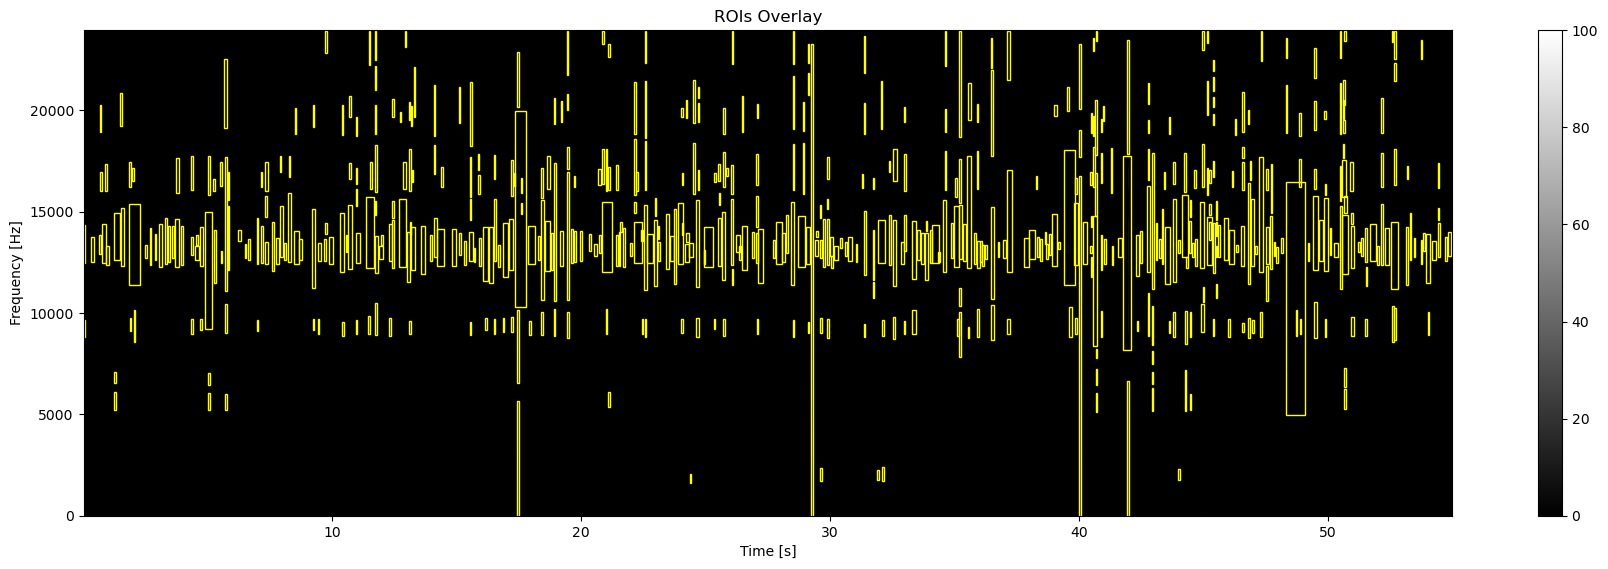

In [ ]:
ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':100, 'extent':ext})


## 2. Compute acoustic features
The ``shape_feaures`` function uses bidimensional wavelets to get the texture and spectro-temporal shape coeficients of each ROI. Wavelets have the advantage of being robust when the signal-to-noise ratio is low, and derive homogeneous descriptors which facilitate the clustering process. The wavelet decomposition is performed on the complete spectrogram, hence the coeficients for ROIs do not vary much even when not the time-frequency bounds are not exact. The centroid features gives an estimate of the median frequency of the ROIs.



In [ ]:
df_shape, params = features.shape_features(Sxx_db, resolution='low', rois=df_rois)
df_centroid = features.centroid_features(Sxx_db, df_rois)

# Get median frequency and normalize
median_freq = fn[np.round(df_centroid.centroid_y).astype(int)]
df_centroid['centroid_freq'] = median_freq/fn[-1]

## 3. Reduce the dimensionality of the features
The shape audio features have 26 dimensions. To facilitate the clustering process and visualize the results, it is posible to use non-metric dimensionality reduction algorithm, namely the t-distributed stochastic neighbor embedding (t-SNE), to proyect the data in two dimensions.



[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 571 samples in 0.000s...
[t-SNE] Computed neighbors for 571 samples in 0.323s...
[t-SNE] Computed conditional probabilities for sample 571 / 571
[t-SNE] Mean sigma: 0.133530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.039604
[t-SNE] KL divergence after 1000 iterations: 0.858766


Text(0, 0.5, 'tsne dim 2')

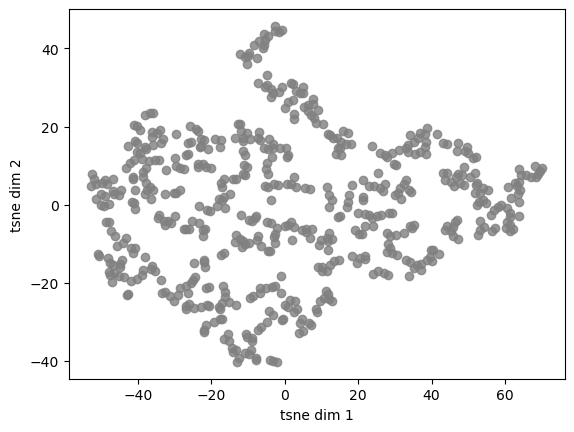

In [ ]:
from sklearn.manifold import TSNE

X = df_shape.loc[:,df_shape.columns.str.startswith('shp')]
X = X.join(df_centroid.centroid_freq) # add column and normalize values

tsne = TSNE(n_components=2, perplexity=12, init='pca', verbose=True)
Y = tsne.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c='gray', alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

## 4. Cluster the ROIs into homogeneous groups. 
In the above plot it is possible to observe how sounds are aggregated. It is posible to group these samples rapidly and objectively using a clustering algorithm. Here, we will use DBSCAN, a simple algorithm that allows to find core samples with high density and expands clusters from them. This algorithm has the advantage to find automatically the number of clusters and can cope with unbalanced classes.



In [ ]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=1, min_samples=3).fit(Y)
print('Number of soundtypes found:', np.unique(cluster.labels_).size)

Number of soundtypes found: 7


Visualize the clustering results



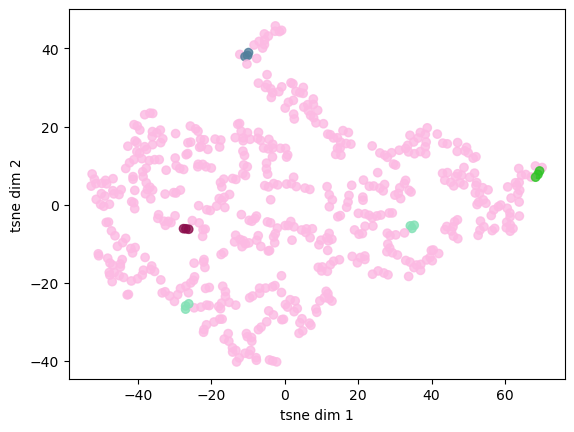

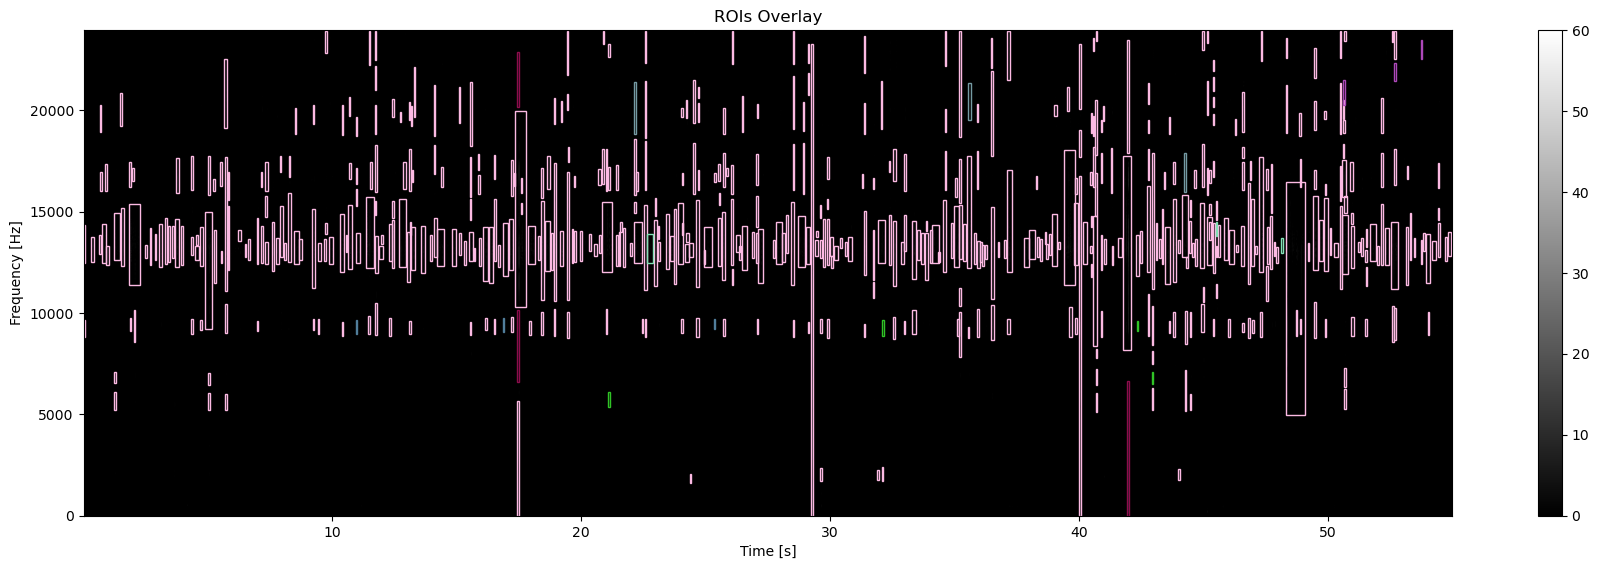

In [ ]:
from maad.util import rand_cmap
fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c=cluster.labels_, cmap=rand_cmap(5 , first_color_black=False), alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

# Overlay bounding box on the original spectrogram
df_rois['label'] = cluster.labels_.astype(str)
ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':60, 'extent':ext})

## References
1. Ulloa, J. S., Aubin, T., Llusia, D., Bouveyron, C., & Sueur, J. (2018). Estimating animal acoustic diversity in tropical environments using unsupervised multiresolution analysis. Ecological Indicators, 90, 346–355. https://doi.org/10.1016/j.ecolind.2018.03.026
2. Sifre, L., & Mallat, S. (2013). Rotation, scaling and deformation invariant scattering for texture discrimination. Computer Vision and Pattern Recognition (CVPR), 2013 IEEE Conference On, 1233–1240. http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=6619007
3. Maaten, L. van der, & Hinton, G. (2008). Visualizing data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579–2605.
4. Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining, 96(34), 226–231.
